## Bin Plot with Quality and examination of replicate type relation to bin quality


This notebook examins the following:
- join of quality with taxonomy and general statistics on bin quality.
- visualization of bin quality on all bins and Lactobacillaceae bins.
- examination of replicate types impact on number of bins.
- examination of replicate types impact on bin quality.
- linear regression of relation between number of bins and sample size.
- examination of bins not annotated with GTDB

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import ranksums

##### Open quality df produced by CheckM_plot.ipynb and the GTDB df's from GTDB_SanityCheck.ipynb

In [3]:
#Small datasets of 56 samples
df_quality = pd.read_csv('../data56_related_files/Contamination_completness_df.csv')
df_all = pd.read_csv('../data56_related_files/GTDB_All.csv')
df_Lactobacillaceae = pd.read_csv('../data56_related_files/GTDB_Lactobacillaceae.csv')

In [217]:
#rename key to get identical in all datasets
df_all = df_all.rename({'user_genome': 'Bin_Id'}, axis=1)
df_Lactobacillaceae = df_Lactobacillaceae.rename({'user_genome': 'Bin_Id'}, axis=1)

In [218]:
df_quality.head(5)

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3,sampleNo,binNo
0,S10C10200,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.0,3,2,10,10200
1,S10C1032,o__Bacteroidales_(UID2654),163,486,266,298,186,2,0,0,0,38.94,0.38,0.0,3,2,10,1032
2,S10C1039,o__Lactobacillales_(UID355),490,334,183,3,331,0,0,0,0,98.91,0.00,0.0,0,0,10,1039
3,S10C1094,k__Bacteria_(UID203),5449,104,58,92,12,0,0,0,0,14.66,0.00,0.0,3,2,10,1094
4,S10C10947,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.0,3,2,10,10947


In [219]:
df_Lactobacillus.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,Species,sample,cluster
0,S10C205,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,84.32,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus crispatus,S10,205
1,S10C362,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,70.24,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus gallinarum,S10,362
2,S10C569,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,95.00,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus johnsonii,S10,569
3,S11C205,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,72.60,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus crispatus,S11,205
4,S11C569,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,84.93,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus johnsonii,S11,569


#### Joining quality with taxonomy
Left join to add the quality to the tax df 

In [220]:
df_Lactobacillus_Q = df_Lactobacillus.join(df_quality.set_index('Bin_Id'), on='Bin_Id')

In [221]:
df_Lactobacillaceae_Q = df_Lactobacillaceae.join(df_quality.set_index('Bin_Id'), on='Bin_Id')

In [222]:
df_all_Q = df_all.join(df_quality.set_index('Bin_Id'), on='Bin_Id')

In [223]:
df_Lactobacillus_Q.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3,sampleNo,binNo
0,S10C205,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,84.32,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,0,0,0,92.48,0.21,100.00,0,0,10,205
1,S10C362,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,70.24,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,0,0,0,88.12,0.65,100.00,1,1,10,362
2,S10C569,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,95.00,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,0,0,0,96.90,0.00,0.00,0,0,10,569
3,S11C205,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,72.60,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,0,0,0,86.04,0.00,0.00,1,1,11,205
4,S11C569,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,84.93,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,1,0,0,96.81,12.08,4.35,3,2,11,569


In [224]:
df_Lactobacillaceae_Q.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3,sampleNo,binNo
0,S10C1039,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,94.58,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,...,0,0,0,98.91,0.00,0.0,0,0,10,1039
1,S10C1113,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,96.07,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,...,0,0,0,99.45,0.00,0.0,0,0,10,1113
2,S10C119,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,67.12,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Weissella,...,0,0,0,71.36,1.07,100.0,1,1,10,119
3,S10C1297,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,93.47,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Ligilactobacillus,...,0,0,0,96.60,0.26,0.0,0,0,10,1297
4,S10C1752,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,85.09,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Ligilactobacillus,...,0,0,0,77.49,0.00,0.0,1,1,10,1752


In [225]:
df_all_Q['cluster'].head(5)

0    1032
1    1039
2    1113
3     119
4    1295
Name: cluster, dtype: int64

### General statistics on quality

In [227]:
df_quality.groupby('class_3').count()

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,sampleNo,binNo
class_3,,,,,,,,,,,,,,,,,
0,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609
1,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755
2,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601


In [228]:
df_all_Q['Completeness'].describe()

count    2382.000000
mean       60.131335
std        31.357057
min         0.000000
25%        29.332500
50%        65.090000
75%        91.167500
max       100.000000
Name: Completeness, dtype: float64

In [229]:
df_all_Q['Contamination'].describe()

count    2382.000000
mean        1.731956
std         9.282143
min         0.000000
25%         0.000000
50%         0.315000
75%         1.227500
max       265.690000
Name: Contamination, dtype: float64

### Bin class distribution and plots of both Lactobacillaceae

In [230]:
def drawScatter(axes, df, palette, yticks=np.arange(0, 101, 25)):
    sns.scatterplot(ax=axes[0],
                    data = df,
                    x = df.Completeness, 
                    y = df.Contamination, 
                    hue = df.class_3,
                    palette = palette,
                    legend = False)

    axes[0].set_xlabel('CheckM Completeness score', fontsize=18)
    axes[0].set_ylabel('CheckM Contamination score', fontsize=18)
    axes[0].set_xticks(np.arange(0, 101, 25))
    axes[0].set_yticks(yticks)
    axes[0].tick_params(axis='x', labelsize=16 )
    axes[0].tick_params(axis='y', labelsize=16 )



In [231]:
def drawHist(axes, df, palette):
    histplt = sns.histplot(ax = axes[1],
                data = df, 
                x = "class_3", 
                hue = "class_3",
                alpha = 0.7,
                bins = 3,
                palette = palette,
                legend = False)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Bin count', fontsize=18)
    axes[1].set_xticks([0.35,1,1.7])
    plt.yticks(fontsize=16)
    axes[1].set_xticklabels(labels = ['compl. >90% \n cont. <5%', 
                                      'compl. ≥50% \n cont. <10%', 
                                      'compl. <50% \n cont. ≥10%'], fontsize=14)
    #adding numbers on top of bars. 
#     for rect in axes[1].patches:
#         height = rect.get_height()
#         axes[1].annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
#                     xytext=(0, 5), textcoords='offset points', ha='center') 

In [232]:
def drawLegend(fig, palette, nrOfclasses):
    if (nrOfclasses == 2):
        medium = Patch(color=palette[1], label='Medium High Quality')
        high = Patch(color=palette[0], label='High Quality')
   
        fig.legend( 
            handles=[medium, high],
            loc = 'center', 
            bbox_to_anchor = (0.5, -0.08),
            ncol = nrOfclasses, 
            fontsize = 16,
            frameon = False)
    
    if (nrOfclasses == 3):
        low = Patch(color=palette[2], label='Low Quality')
        medium = Patch(color=palette[1], label='Medium High Quality')
        high = Patch(color=palette[0], label='High Quality')

        fig.legend( 
            handles=[low, medium, high],
            loc = 'center', 
            bbox_to_anchor = (0.5, -0.08),
            ncol = nrOfclasses, 
            fontsize = 16,
            frameon = False)

    if (nrOfclasses == 4):
        low = Patch(color=palette[3], label='Low Quality')
        mediumHigh = Patch(color=palette[1], label='Medium High Quality \n  SQ > 50')
        mediumLow = Patch(color=palette[2], label='Medium Low Quality \n  SQ < 50')
        high = Patch(color=palette[0], label='High Quality')
    
        fig.legend( 
            handles=[low, mediumLow, mediumHigh, high],
            loc = 'center', 
            bbox_to_anchor = (0.5, -0.08),
            ncol = nrOfclasses, 
            fontsize = 16,
            frameon = False)


In [233]:
def setPalette(paletteName):
    return sns.color_palette(paletteName, 4)

In [234]:
def subplot_binQ (df1, df2, title, nrOfclasses, paletteName, yticks=np.arange(0, 101, 25)):
    fig, axes = plt.subplots(1, 2, figsize=(12,6))
#     fig.suptitle('Bin Quality ' + title, fontsize=20) 
#     plt.yticks(fontsize=16)
#     plt.xticks(fontsize=14)
    
    palette = setPalette(paletteName)
    
    drawScatter(axes, df1, paletteName, yticks)
    
    drawHist(axes, df2, paletteName)
    
    drawLegend(fig, palette, nrOfclasses)
  
    plt.tight_layout()

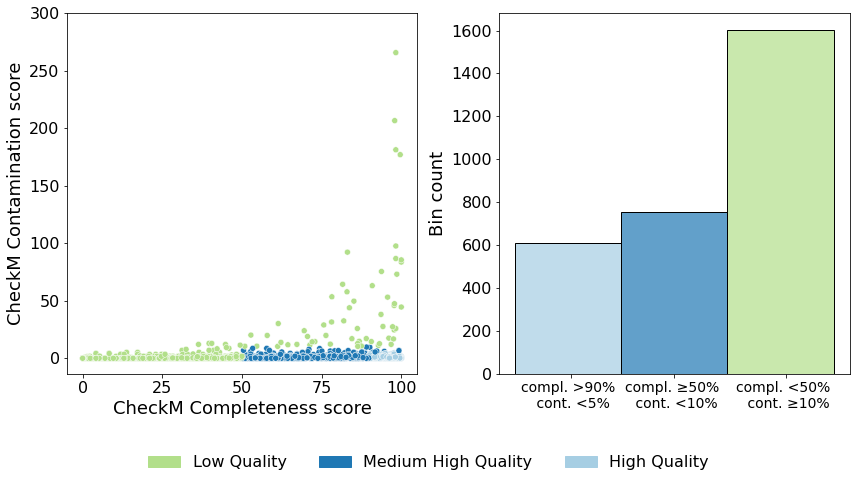

In [235]:
subplot_binQ(df_quality, df_quality, '', nrOfclasses=3, 
             paletteName="Paired", yticks = np.arange(0, 301, 50) )

plt.savefig('../resultFigs/binQuality_allbins.png',  bbox_inches='tight')


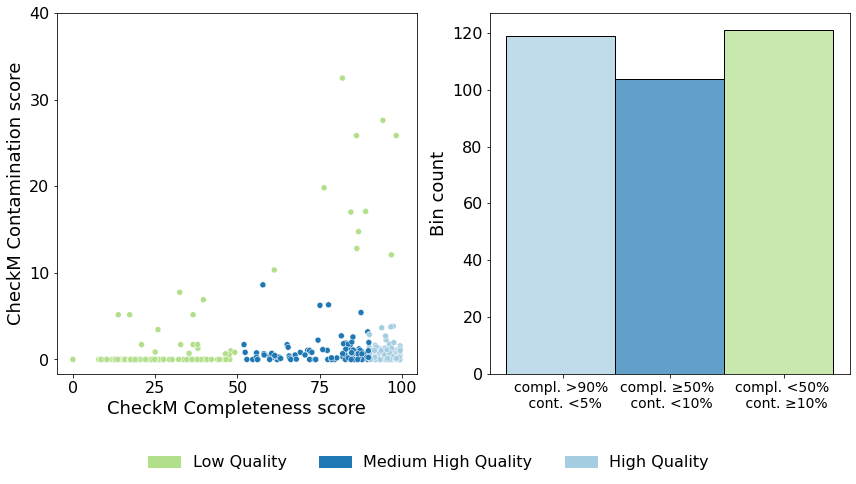

In [237]:
subplot_binQ(df_Lactobacillaceae_Q, df_Lactobacillaceae_Q, 'Family Lactobacillaceae (56)', 
             nrOfclasses=3, paletteName="Paired",  yticks = np.arange(0, 41, 10))
plt.savefig('../resultFigs/binQuality_lactobacillaceae.png',  bbox_inches='tight')


In [239]:
df_Lactobacillaceae_Q.groupby('bin_class').count()

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3,sampleNo,binNo
bin_class,,,,,,,,,,,,,,,,,,,,,
0,119,119,108,119,119,119,119,119,119,119,...,119,119,119,119,119,119,119,119,119,119
1,99,99,96,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,121,121,113,121,121,121,121,121,121,121,...,121,121,121,121,121,121,121,121,121,121


### Saving high Quality bins

In [240]:
df_Lactobacillaceae_Q[df_Lactobacillaceae_Q['bin_class'] == 0].to_csv(
    '../data56_related_files/HighQLactobacillaceae', index = False)

### Bin quality on pooled vs individual samples 

In [241]:
metadata = pd.read_csv('../data56_related_files/Metadata_56samples.tsv', sep='\t')

In [242]:
metadata.head(5)

,Dataset,ID,Country,gender,age.days.,Breed,isolation.location,type,Feed,Temperature,...,vaccine,vægt,humidity,sequencing.method,DNA.extraction,Sample.replicate,location_name.farm.,farm_ID,G_bases,avg Mbases
0,Huang,SRR6323134,China,male,42,Arbor Acres broiler,cecum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,2.4,NaN
1,Huang,SRR6323252,China,male,42,Arbor Acres broiler,duodenum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,2.8,NaN
2,Huang,SRR6323384,China,male,42,Arbor Acres broiler,ileum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,2.6,NaN
3,Huang,SRR6323414,China,male,42,Arbor Acres broiler,jejunum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,3.0,NaN
4,Huang,SRR6323550,China,male,42,Arbor Acres broiler,colorectum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,Combined Newcastle disease virus (NDV) and inf...,NaN,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,3.0,NaN


In [243]:
sample_index = pd.read_csv('../data56_related_files/sampleNamesIndex.txt', header = None)

In [244]:
sample_index.rename(columns={0: 'sampleNo', 1: 'ID'}, inplace=True)

In [245]:
sample_index['sampleNo'] = sample_index.sampleNo + 1

In [246]:
meta_sample = pd.merge(metadata, sample_index, how="inner", on='ID')

In [247]:
def condition_on_replicate(s):
#     'cage', 'free-range', ' conventional_broiler_house'):
    if 'pooled' in s['Sample.replicate']:
        return 'pooled'
    else:
        return 'single_replicate'

In [248]:
meta_sample['replicate_type'] = meta_sample.apply(condition_on_replicate, axis=1)

In [251]:
meta_sample.head(5)

,Dataset,ID,Country,gender,age.days.,Breed,isolation.location,type,Feed,Temperature,...,humidity,sequencing.method,DNA.extraction,Sample.replicate,location_name.farm.,farm_ID,G_bases,avg Mbases,sampleNo,replicate_type
0,Huang,SRR6323134,China,male,42,Arbor Acres broiler,cecum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,2.4,NaN,22,pooled
1,Huang,SRR6323252,China,male,42,Arbor Acres broiler,duodenum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,2.8,NaN,33,pooled
2,Huang,SRR6323384,China,male,42,Arbor Acres broiler,ileum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,2.6,NaN,41,pooled
3,Huang,SRR6323414,China,male,42,Arbor Acres broiler,jejunum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,3.0,NaN,42,pooled
4,Huang,SRR6323550,China,male,42,Arbor Acres broiler,colorectum,broiler,None,reduced from 35 °C on day 1 to 24 °C on day 21...,...,NaN,HiSeq X Ten,NaN,pooled digesta from five chickens,China:Beijing,china1,3.0,NaN,50,pooled


In [252]:
df_quality[['sampleNo', 'binNo']]=df_quality['Bin_Id'].str.split('C', expand=True)

In [253]:
df_quality['sampleNo'] = df_quality['sampleNo'].map(lambda x: x.lstrip('S')).astype(int)

In [254]:
meta_replicate = meta_sample[['sampleNo', 'replicate_type', 'G_bases']]

In [255]:
quality_replicate  = df_quality.join(meta_replicate.set_index('sampleNo'), on='sampleNo')

In [256]:
quality_replicate['replicate_type'].unique()

array(['pooled', 'single_replicate'], dtype=object)

In [257]:
quality_replicate.groupby('replicate_type').count()

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3,sampleNo,binNo,G_bases
replicate_type,,,,,,,,,,,,,,,,,,,
pooled,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
single_replicate,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439


In [258]:
pooled = quality_replicate[quality_replicate['replicate_type']== 'pooled']
single_replicate = quality_replicate[quality_replicate['replicate_type']== 'single_replicate']

In [259]:
def drawcountPlot(axes, df, palette):
    
    sns.countplot(x = 'class_3', 
                  hue = 'replicate_type', 
                  data = df, 
                  palette = palette)
    
    
    axes.set_xticklabels(labels = ['High', 'Medium', 'Low'], fontsize=16)
    axes.set_ylabel('Bin count', fontsize=20)
    axes.set_xlabel('')
    plt.yticks(fontsize=20)
    
    legend_labels, _= axes.get_legend_handles_labels()
    axes.legend(legend_labels, ['Pooled','Single replicate'], 
            loc = 'center', 
            bbox_to_anchor = (0.5, -0.1),
                ncol = 3,
          title='', 
          frameon = False,
          fontsize = 20,
          title_fontsize = 22)


In [260]:
def subplot_binQ_histcompare (df, title, paletteName, yticks=np.arange(0, 101, 25)):
    fig, axes = plt.subplots(1, 1, figsize=(12,6))
#     fig.suptitle('Bin Quality ' + title, fontsize=20) 
#     plt.yticks(fontsize=16)
#     plt.xticks(fontsize=14)
    
    palette = setPalette(paletteName)
    
    drawcountPlot(axes, df, paletteName)
  
    plt.tight_layout()

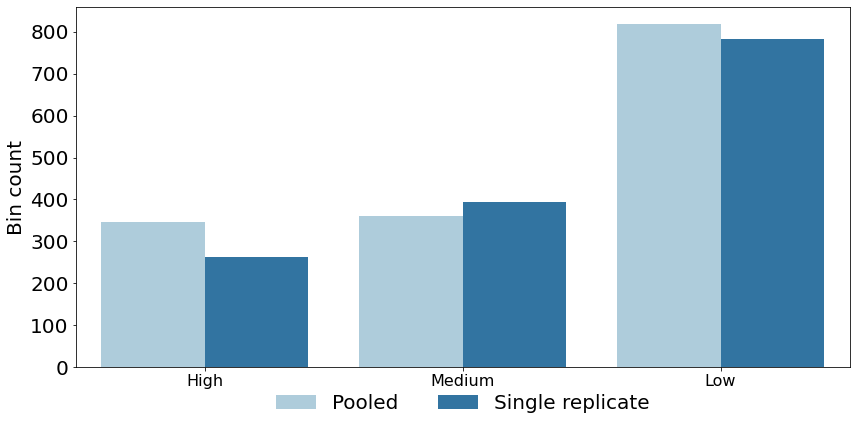

In [261]:
subplot_binQ_histcompare(quality_replicate, 'title', 
             paletteName="Paired" )

plt.savefig('../resultFigs/sampletype_binQ.png', bbox_inches='tight')

To further understand the difference between pooled and individual samples we look into the bins after dereplication to see if the number of bins are replicates to a higher degree in any of the two groups

In [262]:
df_dereplicated_bins = pd.read_csv('../data56_related_files/derepelicatedBins_dRep.tsv')

In [263]:
dereplicated_bins = df_dereplicated_bins['derepelicatedBins_dRep'].str.replace('.fna', '')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [264]:
drep_quality_replicate = quality_replicate[quality_replicate['Bin_Id'].isin(dereplicated_bins)]

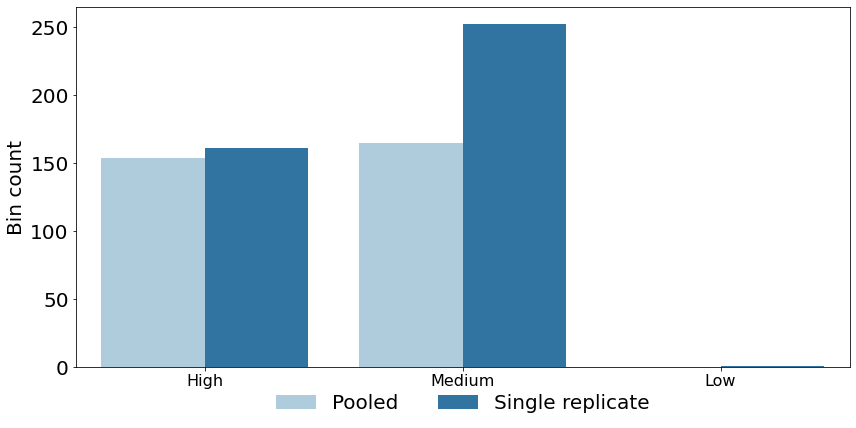

In [265]:
subplot_binQ_histcompare(drep_quality_replicate, 'title', 
             paletteName="Paired" )

plt.savefig('../resultFigs/dRep_sampletype_binQ.png', bbox_inches='tight')

### Count of bins with pooled/single replicates in all and dereplicated bins

In [270]:
pooled.groupby('class_3').count()['Bin_Id']


class_3
0    347
1    361
2    818
Name: Bin_Id, dtype: int64

In [271]:
single_replicate.groupby('class_3').count()['Bin_Id']

class_3
0    262
1    394
2    783
Name: Bin_Id, dtype: int64

In [59]:
drep_pooled = pooled[pooled['Bin_Id'].isin(dereplicated_bins)]

In [60]:
drep_single_replicate = single_replicate[single_replicate['Bin_Id'].isin(dereplicated_bins)]

In [85]:
drep_single_replicate.groupby('bin_class').count()['Bin_Id']

bin_class
0    161
1    218
2     34
3      1
Name: Bin_Id, dtype: int64

In [84]:
drep_pooled.groupby('bin_class').count()['Bin_Id']

bin_class
0    154
1    152
2     13
Name: Bin_Id, dtype: int64

### statistics on contamination and completeness on dereplicated bins

In [201]:
drep_quality_replicate['Contamination'].describe()

count    733.000000
mean       1.137858
std        1.375040
min        0.000000
25%        0.140000
50%        0.790000
75%        1.580000
max        9.760000
Name: Contamination, dtype: float64

In [205]:
drep_quality_replicate['Completeness'].describe()

count    733.000000
mean      82.502892
std       14.984200
min       50.000000
25%       70.080000
50%       86.500000
75%       95.670000
max      100.000000
Name: Completeness, dtype: float64

In [207]:
drep_quality_replicate[drep_quality_replicate['Completeness']>75].describe()['Completeness']

count    510.000000
mean      91.226647
std        7.079990
min       75.070000
25%       85.447500
50%       93.180000
75%       97.535000
max      100.000000
Name: Completeness, dtype: float64

### Replicate type impact in contamination of bins

In [293]:
quality_replicate.groupby('replicate_type').describe()['Contamination']

,count,mean,std,min,25%,50%,75%,max
replicate_type,,,,,,,,
pooled,1526.0,1.392051,8.198235,0.0,0.0,0.0,0.89,181.22
single_replicate,1439.0,1.667248,10.780067,0.0,0.0,0.0,0.99,265.69


In [294]:
quality_replicate.groupby('replicate_type').describe()['Completeness']

,count,mean,std,min,25%,50%,75%,max
replicate_type,,,,,,,,
pooled,1526.0,49.217674,37.355958,0.0,12.07,46.295,89.3125,100.0
single_replicate,1439.0,48.945170,34.595466,0.0,16.07,45.870,84.6200,100.0


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Contamination')

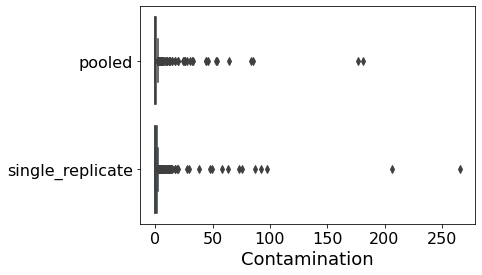

In [295]:
sns.boxplot(quality_replicate['Contamination'], 
            quality_replicate['replicate_type'], palette="Paired")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('')
plt.xlabel('Contamination', fontsize=18)

# plt.savefig('resultFigs/rep_type_contam.png',  bbox_inches='tight')

<AxesSubplot:xlabel='Contamination', ylabel='Count'>

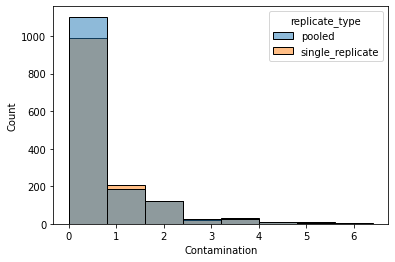

In [196]:
sns.histplot(x=quality_replicate[quality_replicate['Contamination']<6]['Contamination'], hue=quality_replicate['replicate_type'], binwidth=0.8)


In [110]:
max(quality_replicate['Contamination'])

265.69

In [210]:
ranksums(pooled['Contamination'], single_replicate['Contamination'])

RanksumsResult(statistic=-1.2319537804332081, pvalue=0.21796634993222663)

In [211]:
ranksums(pooled['Completeness'], single_replicate['Completeness'])

RanksumsResult(statistic=0.02472406458066018, pvalue=0.9802750601860636)

In [212]:
ranksums(pooled['G_bases'], single_replicate['G_bases'])

RanksumsResult(statistic=28.437417339176157, pvalue=6.973129892222755e-178)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Gbases')

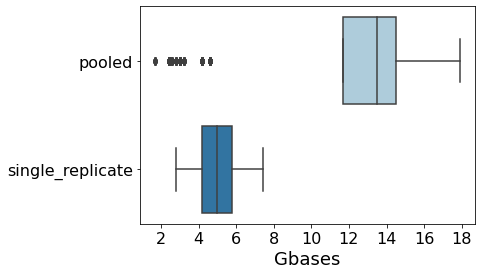

In [296]:
sns.boxplot(quality_replicate['G_bases'], 
            quality_replicate['replicate_type'], palette="Paired")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('')
plt.xlabel('Gbases', fontsize=18)


### Correlation with bin quality and base counts 
Testing if there is a correlation between the number of G bases in each sample and the quality of bins

In [272]:
quality_replicate.head(4)

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3,sampleNo,binNo,replicate_type,G_bases
0,S10C10200,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.0,3,2,10,10200,pooled,11.7
1,S10C1032,o__Bacteroidales_(UID2654),163,486,266,298,186,2,0,0,0,38.94,0.38,0.0,3,2,10,1032,pooled,11.7
2,S10C1039,o__Lactobacillales_(UID355),490,334,183,3,331,0,0,0,0,98.91,0.00,0.0,0,0,10,1039,pooled,11.7
3,S10C1094,k__Bacteria_(UID203),5449,104,58,92,12,0,0,0,0,14.66,0.00,0.0,3,2,10,1094,pooled,11.7


In [273]:
samples_with_quality_count = pd.DataFrame(quality_replicate.groupby('sampleNo').count()['class_3']).reset_index()

In [274]:
samples_with_quality_count.head()

,sampleNo,class_3
0,1,76
1,2,23
2,3,80
3,4,96
4,5,31


In [275]:
replicate_vs_bin = meta_replicate.join(samples_with_quality_count.set_index('sampleNo'), on='sampleNo')

In [276]:
replicate_vs_bin.head()

,sampleNo,replicate_type,G_bases,class_3
0,22,pooled,2.4,46
1,33,pooled,2.8,18
2,41,pooled,2.6,14
3,42,pooled,3.0,14
4,50,pooled,3.0,59


In [277]:
m, b = np.polyfit(replicate_vs_bin['G_bases'], replicate_vs_bin['class_3'], 1)
m

1.2154082805538486

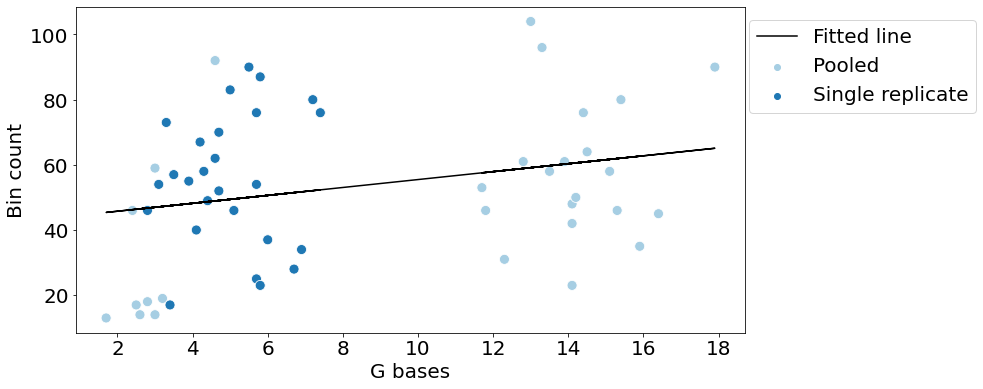

In [278]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.scatterplot(data = replicate_vs_bin, x='G_bases', 
            y='class_3', hue='replicate_type', palette='Paired', s=100)

# ax.set_xticklabels(labels = ['Pooled', 'Single Replicate'], fontsize=16)
ax.set_ylabel('Bin count', fontsize=20)
ax.set_xlabel('G bases', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.plot(replicate_vs_bin['G_bases'], m*replicate_vs_bin['G_bases'] + b, 'black', label='Fitted line')

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Fitted line','Pooled','Single replicate'], 
    loc = 'upper right', 
    bbox_to_anchor = (1.36, 0.99),
    title='', 
    fontsize = 20,
    title_fontsize = 22)


plt.savefig('resultFigs/bases_vs_bins_count',  bbox_inches='tight')

#### looking at the HQ bins and the relation to bases

In [279]:
HQquality_replicate = quality_replicate[quality_replicate['class_3']==0]

In [280]:
samples_with_HQ_count = pd.DataFrame(HQquality_replicate.groupby('sampleNo').count()['class_3']).reset_index()

In [281]:
HQreplicate_vs_bin = meta_replicate.join(samples_with_HQ_count.set_index('sampleNo'), on='sampleNo')

In [282]:
HQreplicate_vs_bin.head()

,sampleNo,replicate_type,G_bases,class_3
0,22,pooled,2.4,8
1,33,pooled,2.8,3
2,41,pooled,2.6,2
3,42,pooled,3.0,5
4,50,pooled,3.0,5


In [283]:
(HQ_m, HQ_b), what, how, this, that = np.polyfit(HQreplicate_vs_bin['G_bases'], HQreplicate_vs_bin['class_3'], 1, full=True)
HQ_m

0.44215786465647805

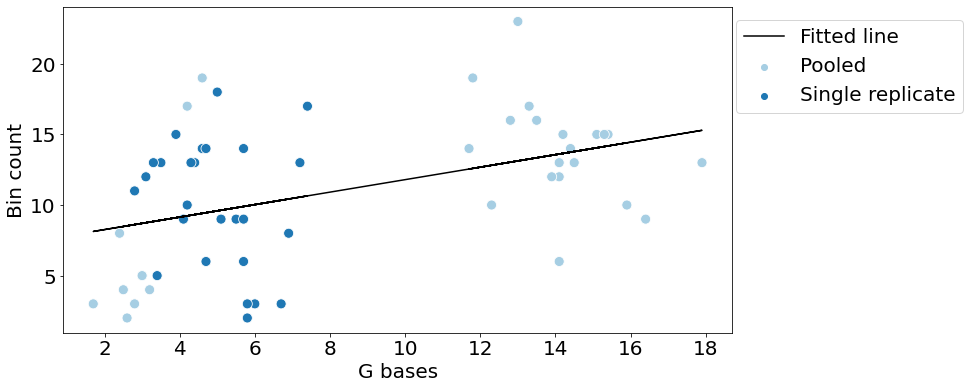

In [284]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.scatterplot(data = HQreplicate_vs_bin, x='G_bases', 
            y='class_3', hue='replicate_type', palette='Paired', s=100)

# ax.set_xticklabels(labels = ['Pooled', 'Single Replicate'], fontsize=16)
ax.set_ylabel('Bin count', fontsize=20)
ax.set_xlabel('G bases', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.plot(HQreplicate_vs_bin['G_bases'], HQ_m*HQreplicate_vs_bin['G_bases'] + HQ_b, 'black', label='Fitted line')

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Fitted line','Pooled','Single replicate'], 
    loc = 'upper right', 
    bbox_to_anchor = (1.36, 0.99),
    title='', 
    fontsize = 20,
    title_fontsize = 22)

plt.savefig('resultFigs/bases_vs_HQbins_count',  bbox_inches='tight')

Both looking at all bins and only the high quality bins there is a correlation with the number of bins found and the amount of bases in the sample.

### Missing bins - from vamb to GTDB

In [285]:
vamb_bins = set(quality_replicate['Bin_Id'])

In [286]:
GTDB_bins = set(df_all_Q['Bin_Id'])

In [287]:
print(len(vamb_bins))
print(len(GTDB_bins))

2965
2382


In [288]:
missing_bins = vamb_bins - GTDB_bins

In [289]:
for bin in missing_bins:
    print(quality_replicate[quality_replicate['Bin_Id'] == bin]['Completeness'], bin)

712    15.52
Name: Completeness, dtype: float64 S22C1032
2549    4.46
Name: Completeness, dtype: float64 S53C4784
490    0.0
Name: Completeness, dtype: float64 S19C341
718    10.66
Name: Completeness, dtype: float64 S22C1515
2756    0.0
Name: Completeness, dtype: float64 S7C2221
550    4.17
Name: Completeness, dtype: float64 S1C341
2462    0.0
Name: Completeness, dtype: float64 S52C284
1587    0.0
Name: Completeness, dtype: float64 S38C2781
2938    9.64
Name: Completeness, dtype: float64 S9C39
1719    0.16
Name: Completeness, dtype: float64 S3C6977
560    0.0
Name: Completeness, dtype: float64 S1C4313
784    6.9
Name: Completeness, dtype: float64 S23C2226
2394    9.48
Name: Completeness, dtype: float64 S51C2465
2126    0.0
Name: Completeness, dtype: float64 S47C7908
2291    0.0
Name: Completeness, dtype: float64 S4C7280
161    13.79
Name: Completeness, dtype: float64 S12C51
2276    4.17
Name: Completeness, dtype: float64 S4C5303
2192    4.17
Name: Completeness, dtype: float64 S49C2235


Name: Completeness, dtype: float64 S12C9082
1745    12.07
Name: Completeness, dtype: float64 S40C2615
1885    10.45
Name: Completeness, dtype: float64 S44C2991
2506    11.91
Name: Completeness, dtype: float64 S53C2510
1585    8.33
Name: Completeness, dtype: float64 S38C2715
1767    7.14
Name: Completeness, dtype: float64 S40C5369
2286    0.0
Name: Completeness, dtype: float64 S4C6395
1707    0.0
Name: Completeness, dtype: float64 S3C4551
1150    12.5
Name: Completeness, dtype: float64 S30C2226
1754    8.33
Name: Completeness, dtype: float64 S40C3478
2944    0.0
Name: Completeness, dtype: float64 S9C4550
26    0.18
Name: Completeness, dtype: float64 S10C3391
308    0.0
Name: Completeness, dtype: float64 S15C2620
1613    0.0
Name: Completeness, dtype: float64 S38C4717
2863    0.0
Name: Completeness, dtype: float64 S8C43
2929    5.17
Name: Completeness, dtype: float64 S9C3039
2365    16.38
Name: Completeness, dtype: float64 S51C1516
2611    4.17
Name: Completeness, dtype: float64 S55C284


Name: Completeness, dtype: float64 S35C1195
1711    0.16
Name: Completeness, dtype: float64 S3C5254
935    4.39
Name: Completeness, dtype: float64 S27C1149
594    0.0
Name: Completeness, dtype: float64 S20C1113
1961    0.0
Name: Completeness, dtype: float64 S45C2882
2555    4.17
Name: Completeness, dtype: float64 S53C6842
1925    10.53
Name: Completeness, dtype: float64 S45C1193
576    11.21
Name: Completeness, dtype: float64 S1C708
2763    0.0
Name: Completeness, dtype: float64 S7C2982
160    0.31
Name: Completeness, dtype: float64 S12C4980
248    0.0
Name: Completeness, dtype: float64 S14C2239
2709    0.0
Name: Completeness, dtype: float64 S6C4310
2714    0.0
Name: Completeness, dtype: float64 S6C4645
69    7.93
Name: Completeness, dtype: float64 S11C2228
754    0.0
Name: Completeness, dtype: float64 S22C848
104    6.03
Name: Completeness, dtype: float64 S12C1150
378    0.0
Name: Completeness, dtype: float64 S16C6043
414    0.0
Name: Completeness, dtype: float64 S17C4177
1422    12.0

Name: Completeness, dtype: float64 S25C351
1142    10.21
Name: Completeness, dtype: float64 S30C1415
1818    4.17
Name: Completeness, dtype: float64 S43C1416
2422    5.17
Name: Completeness, dtype: float64 S51C4457
1835    0.0
Name: Completeness, dtype: float64 S43C382
492    0.16
Name: Completeness, dtype: float64 S19C35334
1867    4.17
Name: Completeness, dtype: float64 S44C1870
2469    0.93
Name: Completeness, dtype: float64 S52C3708
2272    0.0
Name: Completeness, dtype: float64 S4C4910
1626    11.21
Name: Completeness, dtype: float64 S38C9079
2101    12.07
Name: Completeness, dtype: float64 S47C3539
405    0.0
Name: Completeness, dtype: float64 S17C2363
2007    3.11
Name: Completeness, dtype: float64 S46C1641
579    0.0
Name: Completeness, dtype: float64 S1C7383
107    4.17
Name: Completeness, dtype: float64 S12C13518
728    10.53
Name: Completeness, dtype: float64 S22C2227
498    0.0
Name: Completeness, dtype: float64 S19C4287
2553    0.0
Name: Completeness, dtype: float64 S53C56

In [82]:
quality_replicate[quality_replicate['Bin_Id'] == 'S2C205']

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3,sampleNo,binNo,replicate_type,G_bases
1118,S2C205,g__Lactobacillus_(UID377),91,430,154,9,421,0,0,0,0,96.63,0.0,0.0,0,0,2,205,pooled,14.1
